In [1]:
import mynn as nn
from draw_tools.plot import plot

import numpy as np
from struct import unpack
import gzip
import matplotlib.pyplot as plt
import pickle

In [5]:
# fixed seed for experiment
np.random.seed(309)

train_images_path = r'.\dataset\MNIST\train-images-idx3-ubyte.gz'
train_labels_path = r'.\dataset\MNIST\train-labels-idx1-ubyte.gz'

with gzip.open(train_images_path, 'rb') as f:
        magic, num, rows, cols = unpack('>4I', f.read(16))
        train_imgs=np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28*28)
    
with gzip.open(train_labels_path, 'rb') as f:
        magic, num = unpack('>2I', f.read(8))
        train_labs = np.frombuffer(f.read(), dtype=np.uint8)


# choose 10000 samples from train set as validation set.
idx = np.random.permutation(np.arange(num))
# save the index.
with open('idx.pickle', 'wb') as f:
        pickle.dump(idx, f)
train_imgs = train_imgs[idx]
train_labs = train_labs[idx]
valid_imgs = train_imgs[:10000]
valid_labs = train_labs[:10000]
train_imgs = train_imgs[10000:]
train_labs = train_labs[10000:]

# normalize from [0, 255] to [0, 1]
train_imgs = train_imgs / train_imgs.max()
valid_imgs = valid_imgs / valid_imgs.max()

1. 这个训练没有使用权重衰减和调度器

In [6]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 600, 10], 'ReLU', None)
optimizer = nn.optimizer.SGD(init_lr=0.06, model=linear_model)
# scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[800, 2400, 4000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=None)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 17.8008261435427, score: 0.03125
[Dev] loss: 16.163372615632106, score: 0.1209
epoch: 0, iteration: 100
[Train] loss: 0.9379929043918983, score: 0.9375
[Dev] loss: 2.974904571192488, score: 0.8224
epoch: 0, iteration: 200
[Train] loss: 1.726962976802537, score: 0.90625
[Dev] loss: 2.8761128087458174, score: 0.8287
epoch: 0, iteration: 300
[Train] loss: 1.7269388124137242, score: 0.90625
[Dev] loss: 2.2362924131383055, score: 0.8633
epoch: 0, iteration: 400
[Train] loss: 1.3731469510719088, score: 0.90625
[Dev] loss: 2.0657344400046074, score: 0.8723
epoch: 0, iteration: 500
[Train] loss: 2.302560297987357, score: 0.875
[Dev] loss: 1.7106268013261021, score: 0.8942
epoch: 0, iteration: 600
[Train] loss: 2.348584586837016, score: 0.84375
[Dev] loss: 1.7378056871205263, score: 0.8917
epoch: 0, iteration: 700
[Train] loss: 1.9609253842791345, score: 0.84375
[Dev] loss: 1.7147098400927028, score: 0.8922
epoch: 0, iteration: 800
[Train] loss: 1.0576671889

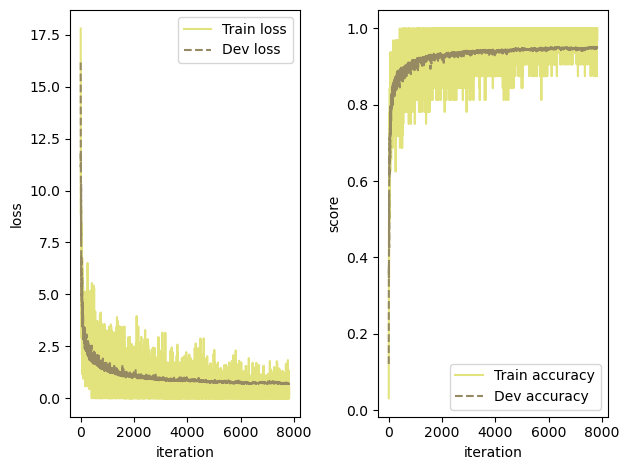

In [7]:
_, axes = plt.subplots(1, 2)
axes.reshape(-1)
_.set_tight_layout(1)
plot(runner, axes)

plt.show()

2. 同样没有使用权重衰减和调度器，更改模型结构

In [21]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 512,128, 10], 'ReLU', None)
optimizer = nn.optimizer.SGD(init_lr=0.001, model=linear_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[800, 2400, 4000], gamma=0.1)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=None)


In [22]:
runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')



epoch: 0, iteration: 0
[Train] loss: 15.54244937614731, score: 0.15625
[Dev] loss: 16.074006547591544, score: 0.1255
epoch: 0, iteration: 100
[Train] loss: 7.483401546293149, score: 0.59375
[Dev] loss: 6.961864859880556, score: 0.616
epoch: 0, iteration: 200
[Train] loss: 6.980106502299035, score: 0.59375
[Dev] loss: 5.373178664013585, score: 0.7024
epoch: 0, iteration: 300
[Train] loss: 3.4538776313660686, score: 0.8125
[Dev] loss: 4.518873004811369, score: 0.7497
epoch: 0, iteration: 400
[Train] loss: 2.878231357805057, score: 0.84375
[Dev] loss: 4.152420963349663, score: 0.77
epoch: 0, iteration: 500
[Train] loss: 1.730296866651586, score: 0.90625
[Dev] loss: 3.7390282180568066, score: 0.7919
epoch: 0, iteration: 600
[Train] loss: 4.601418979694562, score: 0.75
[Dev] loss: 3.4360012986230917, score: 0.8089
epoch: 0, iteration: 700
[Train] loss: 3.246646705245083, score: 0.8125
[Dev] loss: 3.331391288440644, score: 0.8136
epoch: 0, iteration: 800
[Train] loss: 3.387735152247519, scor

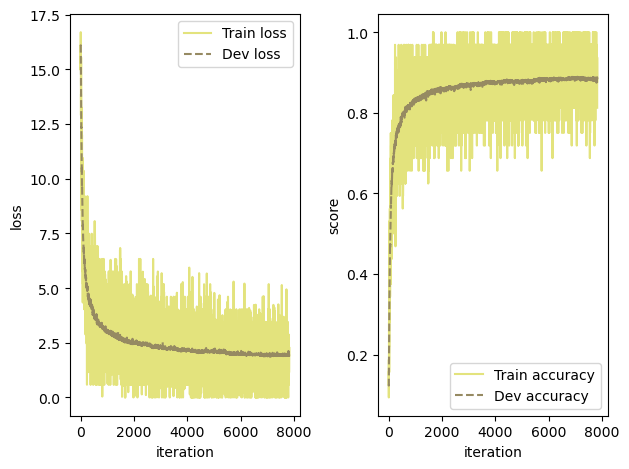

In [23]:
_, axes = plt.subplots(1, 2)
axes.reshape(-1)
_.set_tight_layout(1)
plot(runner, axes)

plt.show()

In [26]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 512,512, 10], 'ReLU', None)
optimizer = nn.optimizer.SGD(init_lr=0.002, model=linear_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[800, 2400, 4000], gamma=0.1)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=None)

In [27]:
runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 17.845034470391354, score: 0.03125
[Dev] loss: 15.783343679765274, score: 0.1422
epoch: 0, iteration: 100
[Train] loss: 3.958394752374261, score: 0.78125
[Dev] loss: 3.5151494698201247, score: 0.8076
epoch: 0, iteration: 200
[Train] loss: 2.3025850842440456, score: 0.875
[Dev] loss: 3.203625404400623, score: 0.8247
epoch: 0, iteration: 300
[Train] loss: 2.878154013812221, score: 0.84375
[Dev] loss: 2.5640228175177624, score: 0.8599
epoch: 0, iteration: 400
[Train] loss: 4.02952390492708, score: 0.78125
[Dev] loss: 2.8636087606829492, score: 0.8432
epoch: 0, iteration: 500
[Train] loss: 4.605170178488091, score: 0.75
[Dev] loss: 2.3511695296461474, score: 0.8712
epoch: 0, iteration: 600
[Train] loss: 2.302585084244046, score: 0.875
[Dev] loss: 2.3680170427483476, score: 0.8696
epoch: 0, iteration: 700
[Train] loss: 2.3025837378816676, score: 0.875
[Dev] loss: 2.0023585519378937, score: 0.8901
epoch: 0, iteration: 800
[Train] loss: 1.151292537122023, 

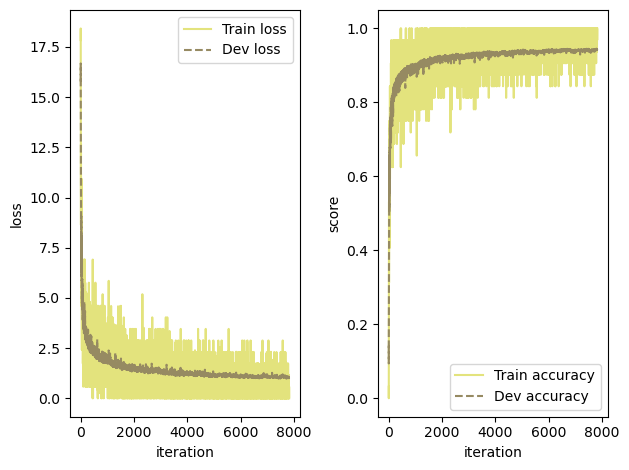

In [28]:
_, axes = plt.subplots(1, 2)
axes.reshape(-1)
_.set_tight_layout(1)
plot(runner, axes)

plt.show()

In [29]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 1024,512, 10], 'ReLU', None)
optimizer = nn.optimizer.SGD(init_lr=0.002, model=linear_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[800, 2400, 4000], gamma=0.1)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=None)

In [30]:
runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 17.269388196830345, score: 0.0625
[Dev] loss: 15.992216511337723, score: 0.1314
epoch: 0, iteration: 100
[Train] loss: 3.4538776312737873, score: 0.8125
[Dev] loss: 3.279892864793477, score: 0.8207
epoch: 0, iteration: 200
[Train] loss: 2.302585084244046, score: 0.875
[Dev] loss: 3.173679345239616, score: 0.8271
epoch: 0, iteration: 300
[Train] loss: 2.878231357805057, score: 0.84375
[Dev] loss: 2.2119496338463427, score: 0.8795
epoch: 0, iteration: 400
[Train] loss: 1.1536305540399077, score: 0.9375
[Dev] loss: 2.2341758713636017, score: 0.8778
epoch: 0, iteration: 500
[Train] loss: 2.878231357805057, score: 0.84375
[Dev] loss: 1.9059118999073024, score: 0.8958
epoch: 0, iteration: 600
[Train] loss: 2.878231357805057, score: 0.84375
[Dev] loss: 1.9366056097856832, score: 0.8941
epoch: 0, iteration: 700
[Train] loss: 2.302585084244046, score: 0.875
[Dev] loss: 1.6391778511627433, score: 0.9103
epoch: 0, iteration: 800
[Train] loss: 1.151292537122023

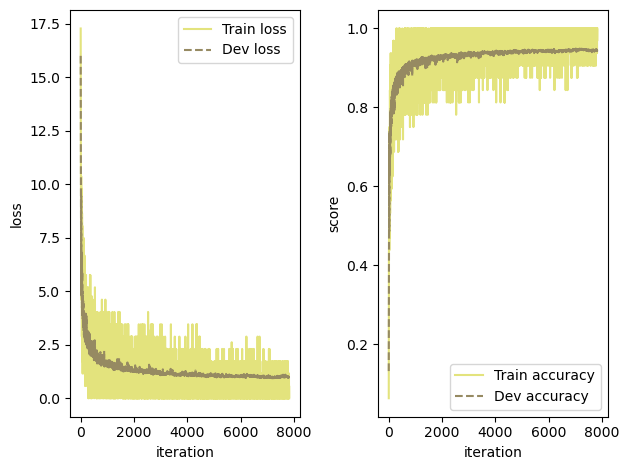

In [31]:
_, axes = plt.subplots(1, 2)
axes.reshape(-1)
_.set_tight_layout(1)
plot(runner, axes)

plt.show()

从各种结果展示来看，第一个模型似乎又快又好，因此为了测试scheduler和weight_dacay的正常工作，添加后再次训练：

In [4]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 600, 10], 'ReLU', [1e-4,1e-4])
optimizer = nn.optimizer.SGD(init_lr=0.06, model=linear_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[800, 2400, 4000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 14.960679249524652, score: 0.15625
[Dev] loss: 15.358970000947622, score: 0.1538
epoch: 0, iteration: 100
[Train] loss: 5.180857614126531, score: 0.71875
[Dev] loss: 3.5991580323384937, score: 0.7866
epoch: 0, iteration: 200
[Train] loss: 3.240149210990002, score: 0.8125
[Dev] loss: 3.423131617062485, score: 0.7965
epoch: 0, iteration: 300
[Train] loss: 1.6676360745192054, score: 0.875
[Dev] loss: 2.2513057725612846, score: 0.8623
epoch: 0, iteration: 400
[Train] loss: 6.539031478789301, score: 0.625
[Dev] loss: 2.220710975383513, score: 0.8636
epoch: 0, iteration: 500
[Train] loss: 1.6330268250119566, score: 0.90625
[Dev] loss: 2.056080774793235, score: 0.8714
epoch: 0, iteration: 600
[Train] loss: 0.6317465929380378, score: 0.9375
[Dev] loss: 1.6600027179943848, score: 0.8956
epoch: 0, iteration: 700
[Train] loss: 3.348920482268386, score: 0.8125
[Dev] loss: 1.5348136237777026, score: 0.9026
epoch: 0, iteration: 800
[Train] loss: 1.151228007806514

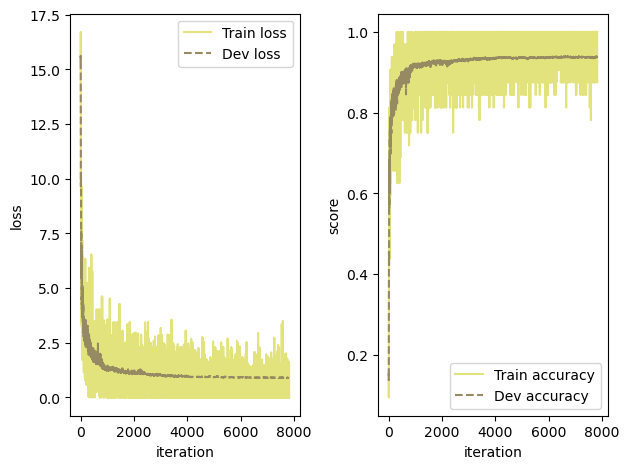

In [5]:
_, axes = plt.subplots(1, 2)
axes.reshape(-1)
_.set_tight_layout(1)
plot(runner, axes)

plt.show()

动量优化器测试：

In [4]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 600, 10], 'ReLU', [1e-4,1e-4])
optimizer = nn.optimizer.MomentGD(init_lr=0.06, model=linear_model,mu=0.1)


scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[800, 2400, 4000], gamma=0.5)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 16.469543829299575, score: 0.09375
[Dev] loss: 14.92564207004395, score: 0.1778
epoch: 0, iteration: 100
[Train] loss: 2.3025846806477146, score: 0.875
[Dev] loss: 3.128643120267998, score: 0.813
epoch: 0, iteration: 200
[Train] loss: 2.2276499249303683, score: 0.875
[Dev] loss: 2.3538399805667427, score: 0.8602
epoch: 0, iteration: 300
[Train] loss: 2.395179091397031, score: 0.84375
[Dev] loss: 2.0102419954096344, score: 0.8769
epoch: 0, iteration: 400
[Train] loss: 2.4517749403264633, score: 0.84375
[Dev] loss: 1.9466988393532312, score: 0.8802
epoch: 0, iteration: 500
[Train] loss: 3.453855440635607, score: 0.8125
[Dev] loss: 1.7050844087760881, score: 0.8934
epoch: 0, iteration: 600
[Train] loss: 2.2508878492127256, score: 0.8125
[Dev] loss: 1.7435273955586519, score: 0.8922
epoch: 0, iteration: 700
[Train] loss: 1.403925823560821, score: 0.90625
[Dev] loss: 1.9003658543532882, score: 0.8826
epoch: 0, iteration: 800
[Train] loss: 1.9918535645999

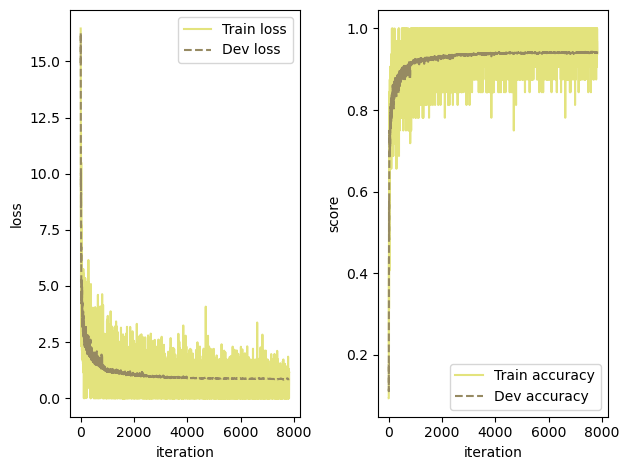

In [5]:
_, axes = plt.subplots(1, 2)
axes.reshape(-1)
_.set_tight_layout(1)
plot(runner, axes)

plt.show()

In [5]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 512,512, 10], 'ReLU', None)
optimizer = nn.optimizer.SGD(init_lr=0.002, model=linear_model)
scheduler = nn.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[800, 2400, 4000], gamma=0.1)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=None)

In [6]:
runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=20, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 17.269388196830345, score: 0.0625
[Dev] loss: 17.459929239819235, score: 0.052
epoch: 0, iteration: 100
[Train] loss: 13.239864281903264, score: 0.28125
[Dev] loss: 15.002248366869411, score: 0.184
epoch: 0, iteration: 200
[Train] loss: 9.786068202425835, score: 0.46875
[Dev] loss: 12.907473258212923, score: 0.294
epoch: 0, iteration: 300
[Train] loss: 10.937279185030022, score: 0.40625
[Dev] loss: 11.027118592648076, score: 0.399
epoch: 0, iteration: 400
[Train] loss: 9.210343121919243, score: 0.5
[Dev] loss: 9.520051631274457, score: 0.482
epoch: 0, iteration: 500
[Train] loss: 9.252079993278684, score: 0.46875
[Dev] loss: 8.596916701934104, score: 0.533
epoch: 0, iteration: 600
[Train] loss: 8.059120802131428, score: 0.5625
[Dev] loss: 7.889279055321775, score: 0.568
epoch: 0, iteration: 700
[Train] loss: 7.483401019924037, score: 0.59375
[Dev] loss: 7.348134444107212, score: 0.599
epoch: 0, iteration: 800
[Train] loss: 6.332108999171126, score: 

In [7]:
runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=20, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 1.7269388106830346, score: 0.90625
[Dev] loss: 1.9579126848896085, score: 0.893
epoch: 0, iteration: 100
[Train] loss: 5.180821986900723, score: 0.71875
[Dev] loss: 1.7451747499076913, score: 0.904
epoch: 0, iteration: 200
[Train] loss: -9.999999889225291e-09, score: 1.0
[Dev] loss: 1.7652249759360397, score: 0.902
epoch: 0, iteration: 300
[Train] loss: 1.7953309318447994, score: 0.875
[Dev] loss: 1.8378705558815778, score: 0.899
epoch: 0, iteration: 400
[Train] loss: 1.7269388106830341, score: 0.90625
[Dev] loss: 1.8397399926772733, score: 0.898
epoch: 0, iteration: 500
[Train] loss: -9.999999889225291e-09, score: 1.0
[Dev] loss: 1.8129740689173763, score: 0.901
epoch: 0, iteration: 600
[Train] loss: 1.7269388106830343, score: 0.90625
[Dev] loss: 1.7814143904133284, score: 0.901
epoch: 0, iteration: 700
[Train] loss: 0.5756462635610066, score: 0.96875
[Dev] loss: 1.8165463117143572, score: 0.9
epoch: 0, iteration: 800
[Train] loss: -9.9999998892252

exponentialLR测试：

In [3]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 512,512, 10], 'ReLU', [1e-4,1e-4,1e-4])
optimizer = nn.optimizer.SGD(init_lr=0.002, model=linear_model)
scheduler = nn.lr_scheduler.ExponentialLR(optimizer=optimizer,update_count=1000, gamma=0.99)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler)

In [6]:
runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 18.420680743952367, score: 0.0
[Dev] loss: 16.59023746513482, score: 0.098
epoch: 0, iteration: 100
[Train] loss: 2.302585084244046, score: 0.875
[Dev] loss: 3.7347756486718984, score: 0.795
epoch: 0, iteration: 200
[Train] loss: 1.1512925371220228, score: 0.9375
[Dev] loss: 3.028232917902076, score: 0.834
epoch: 0, iteration: 300
[Train] loss: 1.1512925371223979, score: 0.9375
[Dev] loss: 2.8586390069369263, score: 0.844
epoch: 0, iteration: 400
[Train] loss: 4.029523736884533, score: 0.78125
[Dev] loss: 2.584572173610645, score: 0.858
epoch: 0, iteration: 500
[Train] loss: 2.3025850842440456, score: 0.875
[Dev] loss: 2.002007914379239, score: 0.888
epoch: 0, iteration: 600
[Train] loss: 2.8782313578050576, score: 0.84375
[Dev] loss: 2.228190124574967, score: 0.878
epoch: 0, iteration: 700
[Train] loss: 2.302585084244046, score: 0.875
[Dev] loss: 1.899792615967128, score: 0.895
epoch: 0, iteration: 800
[Train] loss: 2.878231357805057, score: 0.8437

In [4]:
runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 17.269388196830345, score: 0.0625
[Dev] loss: 16.580392721072755, score: 0.099
epoch: 0, iteration: 100
[Train] loss: 6.332108999171126, score: 0.65625
[Dev] loss: 4.448214703980464, score: 0.757
epoch: 0, iteration: 200
[Train] loss: 3.559677928017553, score: 0.78125
[Dev] loss: 3.239898561344465, score: 0.822
epoch: 0, iteration: 300
[Train] loss: 2.3025852223335406, score: 0.875
[Dev] loss: 2.555601558110668, score: 0.86
epoch: 0, iteration: 400
[Train] loss: 2.878231357805057, score: 0.84375
[Dev] loss: 2.390157914911244, score: 0.868
epoch: 0, iteration: 500
[Train] loss: 1.151292537122023, score: 0.9375
[Dev] loss: 2.277399464693177, score: 0.875
epoch: 0, iteration: 600
[Train] loss: 0.5756462635610116, score: 0.96875
[Dev] loss: 1.955264462712491, score: 0.892
epoch: 0, iteration: 700
[Train] loss: 2.878231357805057, score: 0.84375
[Dev] loss: 2.2148720641096125, score: 0.879
epoch: 0, iteration: 800
[Train] loss: 2.8782313578050576, score: 

2范数层测试：

In [3]:
linear_model = nn.models.Model_MLP([train_imgs.shape[-1], 512,512, 10], 'ReLU', None)
optimizer = nn.optimizer.SGD(init_lr=0.002, model=linear_model)
scheduler = nn.lr_scheduler.ExponentialLR(optimizer=optimizer,update_count=1000, gamma=0.99)
loss_fn = nn.op.MultiCrossEntropyLoss(model=linear_model, max_classes=train_labs.max()+1)
# reg_loss=nn.op.L2Regularization(linear_model)

runner = nn.runner.RunnerM(linear_model, optimizer, nn.metric.accuracy, loss_fn, scheduler=scheduler,reg=True)

In [4]:
runner.train([train_imgs, train_labs], [valid_imgs, valid_labs], num_epochs=5, log_iters=100, save_dir=r'./best_models')

epoch: 0, iteration: 0
[Train] loss: 20.608472608479488, score: 0.0625
[Dev] loss: 16.58039369754197, score: 0.099
epoch: 0, iteration: 100
[Train] loss: 10.580342007845683, score: 0.59375
[Dev] loss: 4.367080206867826, score: 0.761
epoch: 0, iteration: 200
[Train] loss: 7.365046691109429, score: 0.78125
[Dev] loss: 3.169921431330466, score: 0.827
epoch: 0, iteration: 300
[Train] loss: 5.061595781779387, score: 0.90625
[Dev] loss: 2.725730858269073, score: 0.851
epoch: 0, iteration: 400
[Train] loss: 5.908147589287761, score: 0.84375
[Dev] loss: 2.5291586792720104, score: 0.862
epoch: 0, iteration: 500
[Train] loss: 5.060404629152574, score: 0.90625
[Dev] loss: 2.1016563921099336, score: 0.883
epoch: 0, iteration: 600
[Train] loss: 4.484239435861109, score: 0.9375
[Dev] loss: 1.8250663158537863, score: 0.9
epoch: 0, iteration: 700
[Train] loss: 6.786355774522386, score: 0.8125
[Dev] loss: 2.1647834725030957, score: 0.881
epoch: 0, iteration: 800
[Train] loss: 5.6346241416379685, score: